In [2]:
# 24 연습
import pandas as pd # 데이터 처리
import numpy as np # 행렬 연산
import matplotlib # 데이터 시각화
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf # 선형 회귀분석모델 (y ~X1 _ X2 _ ...)
from statsmodels.api import qqplot # 회귀분석의 정규성 확인

In [3]:
matplotlib.rc("font", family = "Malgun Gothic") # 맑은 고딕 적용
matplotlib.rc("axes", unicode_minus = False) # 음수 표시

In [4]:
df_raw = pd.read_csv("/home/piai/다운로드/2주차 실습파일/2. Big Data 분석/부품수리시간.csv")
df_raw.head()

,UNITS,MINUTES
0,1,23
1,2,29
2,3,49
3,4,64
4,4,74


In [5]:
df_raw.describe().round(3)

,UNITS,MINUTES
count,14.000,14.000
mean,6.000,97.214
std,2.961,46.217
min,1.000,23.000
25%,4.000,66.500
50%,6.000,96.500
75%,8.750,138.500
max,10.000,166.000


<Axes: xlabel='UNITS', ylabel='MINUTES'>

findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font famil

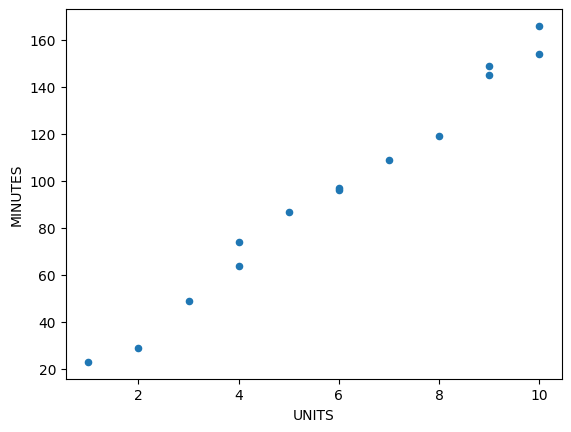

In [6]:
# 그래프(산점도) 분석
# 목표변수와 설명변수의 산점도
df_raw.plot.scatter(x = "UNITS", y = "MINUTES")

# 결론 : UNITS(설명변수)가 증가함에 따라 MINUTES(수리시간)도 증가

In [7]:
# 상관관계 분석
# 목표변수와 설명변수의 상관계수
df_raw.corr(method = "pearson").round(3)

# 결론 : 상관 계수가 0.994로 두 변수 간에는 매우 높은 선형 관계가 있음

# corr 메서드는 각 열 간의 상관 계수를 반환하는 메서드
# 상관계수 산정 방식에는 "피어슨 상관계수" 등 기타 2개

# 피어슨 상관계수 pearson는 두 변수 간의 선형 상관관계를 계량화 한 수치
# +1과 -1 사이의 값을 가짐
# +1의 경우 완벽함 선형 상관 관계 / -1의 경우 완벽한 음의 상관관계 / 0의 경우 선형 상관관계를 갖지 않는다.

# df.corr(method = 'pearson', min_periods = 1)
# method : {pearson / kendall / spearman} 적용할 상관계수 방식이다.
# min_periods : 유효한 결과를 얻기위한 최소 값의 수 이다.
# 사이트 예시 참고

,UNITS,MINUTES
UNITS,1.000,0.994
MINUTES,0.994,1.000


In [8]:
# 선형 회귀 분석 : formula(y ~ X1 + X2 + ...) 이용
# 상수항(Intercept)은 자동으로 추가됨
reg_model = smf.ols(formula = "MINUTES ~ UNITS", data = df_raw)
reg_result = reg_model.fit() 
print(reg_result.summary())

# OLS Model
# 1. OLS Model은 선형 회귀분석에 있어서 각각의 독립변수 x가 종속변수 y에 영향이 있는지 단적으로 확인 가능
# 2. 다른 독립변수들을 배제하고 특정 변수에 있어서 독립변수에 영향을 주는지 확인
# 3. 회귀 방정식에서 각 변수의 계수값을 알 수 있다.

# model = ols(formula = "예측하고자 하는 컬럼 ~ 원인이 되는 컬럼", data = data)
# model.fit()
# 파라미터 formula는 "예측하고자 하는 칼럼 이름 ~ 원인이 되는 칼럼 이름"을 설정
# data에는 내가 가지고 있는 DataFrame을 넣는다.

# 즉, OLS Model을 사용해 예측할 MINUTES과 원인이 되는 UNITS를 df_raw 데이터프레임에서 가져온다.

# fit() 함수 -> 훈련해라 / 머신러닝이 데이터에 머신러닝 모델을 맞추는 것(fit)
# 데이터를 학습시키는 메서드라고 생각

# summary를 통해 OLS 결과를 종합적으로 도출해주는 라이브러리

/home/piai/anaconda3/lib/python3.10/site-packages/scipy/stats/_stats_py.py:1971: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  k, _ = kurtosistest(a, axis)


                            OLS Regression Results                            
Dep. Variable:                MINUTES   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.986
Method:                 Least Squares   F-statistic:                     943.2
Date:                Mon, 05 Aug 2024   Prob (F-statistic):           8.92e-13
Time:                        15:58:07   Log-Likelihood:                -42.374
No. Observations:                  14   AIC:                             88.75
Df Residuals:                      12   BIC:                             90.03
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.1617      3.355      1.240      0.2

In [ ]:
# Dep.Variable = 내가 예측하고자 한 Y값 데이터 = MINUTES
# Model : OLS 모델 사용
# Method : 최소 제곱 / 날 / 시

# No. Observations : 분석 자료 수 14개
# DF Residuals : 잔차 자유도 (n - k) n은 데이터 개수, k는 미지수의 개수 12 (14 - 2)
# -> 어떻게 미지수의 개수를 알지? ----> 데이터의 총 개수 - 독립변수 - 자동할당 1 (14 - 1 - 1) ㅇㅇ
# DF Model : 모델 자유도 : 1 (독립변수의 개수) -----> 원인이 될

# R-squared : 전체 변동 중 n%를 설명할 수 있다(설명력) SSR / SST 값이며 SST는 SSR + SSE로 표현
# -> SSR : 설명 안된 변동
# -> SST : 총 변동
# -> SSE : 설명된 변동
# 즉, 설명 안된 변동 나누기 총 변동을 하며 총 변동은 설명 안된 변동 + 설명된 변동이다.
# 전체 데이터 중 해당 회귀모델이 설명할 수 있는 데이터의 비율, 1에 가까울수록 성능이 좋음


# Adj. R-squared : 모델에 도움이 되는 데이터에 따라 조정된 결정계수 98.6%

# 설명력은 0.987
# -> UNITS로 MINUTES 변동의 98.7%을 설명할 수 있다.

# F-statistic : 분산분석결과 : 943.2
# -> p값이 유의수준 0.05보다 작으므로 회귀모델로서 유의 ? ---> 8.92e-13은
# e는 앞에 0.ooxxx이 생략된 것 즉, 0.000000000000892 라는 뜻 즉즉 0.05보다 작다.
# F통계량으로 도출된 회귀식이 적절한지 볼 수 있다. 0과 가까울 수록 적절한 것

# Prob(F-statistics) : 회귀식이 유의미한지 판단. (0.05이하일 경우 변수끼리 매우 관련있다고 판단) : 8.92e-13

# AIC : 표본의 개수와 모델의 복잡성을 기반으로 모델을 평가. 수치가 낮을 수록 좋음 : 88.75
# BIC : AIC와 유사하나 패널티를 부여하여 AIC보다 모델 평가 성능이 더 좋다., 수치가 낮을 수록 좋다. : 90.03

# coef : 각 변수에 대한 계수값, 회귀계수
# std err : 계수 추정치의 표준오차, 값이 작을 수록 좋음
# t : t값, t-test, 독립변수와 종속변수 사이의 상관관계, 값이 클수록 상관도가 큼
# P > |t| : 회귀계수 검정, p-value
# -> 절편의 유의성은 검토하지 않음, 회귀식에서는 절편의 유의성 상관없이 절편 포함
# -> UNITS의 p값이 유의수준 0.05보다 작으므로 유의
# 즉, 요인이 될 UNITS p값이 0.000이므로 위와 같이 해당
# 독립변수들의 유의 확률, 0.05보다 작아야 유의미함. 만약 0.05보다 크다면 통계적으로 유의하지 않다.
# [0.025 0.975] : 회귀 계수의 신뢰구간

# Omnibus : 디아고스티노 검정, 비대칭도와 첨도를 결합한 정규성 테스트. 값이 클수록 정규분포를 따름
# Prob(Omnibus) : 디아고스티노 검정이 유의한지 판단 (0.05이하일 경우 유의미하다고 판단)
# Skew(왜도) : 평균 주위의 잔차들의 대칭하는지를 보는 것.  0에 가까울수록 대칭
# Kurtosis(첨도) : 잔차들의 분포 모양. 3에 가까울수록 정규분포. (음수이면 평평한 형태. 양수는 뾰족한 형태)
# Durbin - Watson : 더빈왓슨 정규성 검정이며, 잔차의 독립성 여부를 판단. (1.5 ~ 2.5 사이일 때 잔차는 독립적이라고 판단 / 0이나 4에 가까울 수록 잔차들은 자기상관을 가지고 있다고 판단))
# Jarque - BEra (JB) : 자크베라 정규성 검정, 값이 클수록 정규분포의 데이터를 사용했다는 것
# Cond. No : 다중공선성 검정. 독립변수간 상관관계가 있는지 보는 것. 10이상이면 다중공선성이 있다고 판단.

findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font famil

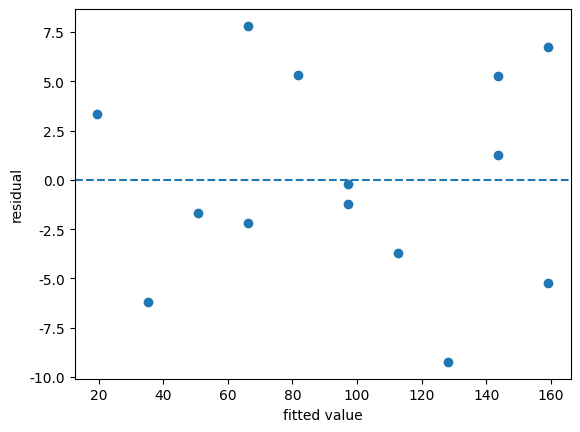

In [10]:
# 잔차 산점도 : X-예측값, Y-잔차
plt.scatter(reg_result.fittedvalues, reg_result.resid)
# 산점도는 두 변수의 상관 관계를 직교 좌표계의 평면에 점으로 표현하는 그래프
# fittedvalues로 학습에 사용된 설명변수에 대응하는 작업시간의 추정치를 얻을 수 있다.
# resid로 모델 검증에 필요한 잔차를 구할 수 있다.

plt.xlabel("fitted value"); plt.ylabel("residual")
# x축 이름 = plt.xlabel("이름")
# y축 이름 = plt.ylabel("이름")
plt.axhline(y = 0, linestyle = "--")
# 지정 위치에 수직 / 수평선을 그린다.
# axhline() 가로선 그리기
# axhline(y값, linestyle = 라인스타일)

# 결론 : 잔차가 y=0을 기준으로 Random하게 산포되어 있으므로 등분산성을 만족

findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font famil

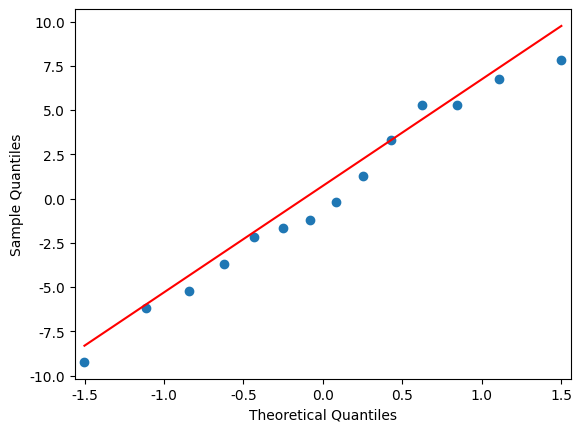

findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font famil

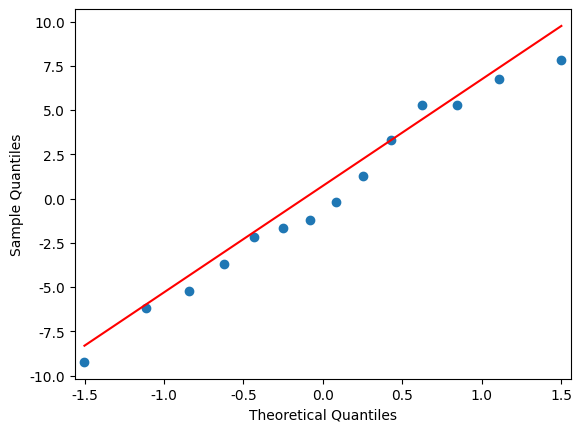

In [11]:
# 잔차 정규성 검정 : Q-Q plot, s-standardized line,
# r-regression line, q-quartiles
qqplot(reg_result.resid, line = "q")

# QQ 플롯의 Quantile은 분위수라는 의미
# 분위수는 데이터를 오름차순(내림차순) 정렬한 뒤, 전체 데이터를 특정 개수로 나눌 때 기준이 되는 수
# ex) 4분위수는 전체 데이터를 25% 50% 75% 100%로 4등분한다는 것이다.

# QQ 플롯 활용
# 1. 주어진 데이터가 정규분포하는지 판단
# 2. 주어진 두 세트의 데이터가 같은 분포인지 판단
# 3. 회귀분석 등에서 잔차의 정규성 판단

# qqplot(resid, line = "s")
# -> line = "s"는 잔차가 정규분포를 따르면 그래프에 그려지는 선상에 위치함을 의미

# resid로 모델 검증에 필요한 잔차를 구할 수 있다.

# qqplot의 line()
# line { None, "45", "s", "r", "q"}
# 45 : 45도 선
# s : 표준하된 선, 예상 주문 통계는 주어진 샘플의 표준 편차에 따라 조정되고 평균이 추가
# r : 회귀선이 적합
# q : 선이 사분위수에 맞다.
# 없음 : 기본적으로 플롯에 참조선이 추가되지 않음

# 결론 : 정규분포 직선(적색 선)을 중심으로 분포하므로 정규분포를 따름
# reg_result 잔차를 구하고 선이 사분위수에 맞는 정규성 검정을 만들라.


findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font famil

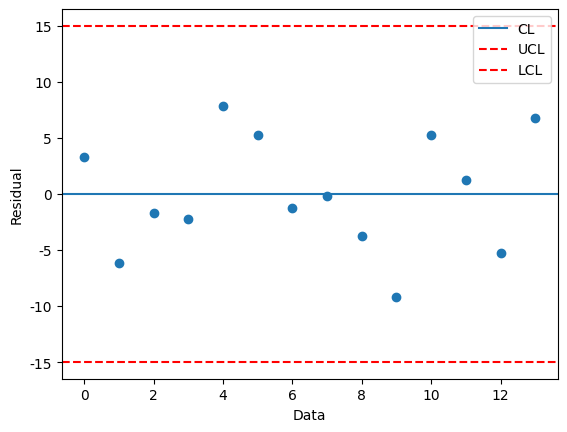

In [12]:
# 잔차의 독립성 확인
plt.scatter(df_raw.index, reg_result.resid, marker = "o")
# df_raw(데이터프레임) 인덱스값을 x축 값으로 하고 reg_result 잔차를 y축 값으로 하고 마커는 채운 원으로 한 산점도를 만들어라.
plt.xlabel("Data"); plt.ylabel("Residual")
# x축은 Data를 y축은 Residual로 해라.
plt.axhline(y = 0, linestyle = "-", label = 'CL')
# 가로선은 0을 기준으로 - 스타일, 라벨은 CL로 한다.
plt.axhline(y = 3*np.std(reg_result.resid), linestyle ="--", color="red", label = 'UCL')
# 가로선은 3 * reg_result 잔차의 표준편차에 위치하고 스타일은 -- 색상은 빨강, 라벨은 UCL로 한다.
plt.axhline(y = -3*np.std(reg_result.resid), linestyle = "dashed", color="red", label = 'LCL')
# 가로선은 -3 * reg_result 잔차의 표준편차에 위치하고 스타일은 대시로 색상은 레드로 라벨은 LCL로 한다.
plt.legend(); plt.show()
# 범례를 추가하고 표를 보여준다.

# 산점도 marker 종류
# 산점도의 마커 스타일은 marker 옵션을 사용하여 입력
# marker에는 2가지 종류가 있다. unfilled marker / filled marker
# 이 문제는 filled marker이다. 종류
# 'o', 'v', '^', '<', '>', '8', 's', 'p', '*', 'h', 'H', 'D', 'd', 'P', 'X'

# 결론 : 잔차가 y=0을 기준으로 관리상하한을 벗어나지 않고 Random하게 산포되어 있으므로 독립성을 만족

In [25]:
# p44 연습
import pandas as pd # 데이터 구성 : Series, DataFrame
import numpy as np # 행렬 연산
import matplotlib # 데이터 시각화
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.formula.api as smf # 선형 회귀모델 formula(y ~ X1 + X2 + ...)
from statsmodels.api import qqplot, add_constant # 잔차의 정규성 확인 : qqplot, 회귀분석의 상수항 추가 : add_constant
from statsmodels.stats.outliers_influence import variance_inflation_factor # 다중공선성 확인
from sklearn.model_selection import train_test_split # 학습용/평가용 데이터 분리 : train, test
from sklearn.linear_model import LinearRegression # 선형회귀모형
from sklearn.feature_selection import RFE # 변수선택법(후진제거법)
from sklearn.preprocessing import StandardScaler # Scale 변환 -> 표준화 회귀계수 산출
from sklearn.metrics import r2_score # 평가함수

In [26]:
# 한글 폰트
matplotlib.rc("font", family = "Malgun Gothic") # 맑은 고딕 적용
matplotlib.rc("axes", unicode_minus = False) # 음수 표시

In [27]:
# 데이터 불러오기
df_raw = pd.read_csv("/home/piai/다운로드/2주차 실습파일/2. Big Data 분석/체질검사.csv", encoding = 'euc-kr')
df_raw.head()
# 몸무게와 키가 단위와 같이 들어있음.

,FAT,AGE,WEIGHT,HEIGHT,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST,GENDER
0,35.2,46,363.15 lb,72.25 inch,51.2,136.2,148.1,147.7,87.3,49.1,29.6,45.0,29.0,21.4,남성
1,11.8,27,168 lb,71.25 inch,38.1,93.0,79.1,94.5,57.3,36.2,24.5,29.0,30.0,18.8,남성
2,22.2,69,177.75 lb,68.5 inch,38.7,102.0,95.0,98.3,55.0,38.3,21.8,30.8,25.7,18.8,남성
3,10.6,57,147.75 lb,65.75 inch,35.2,99.6,86.4,90.1,53.0,35.0,21.3,31.7,27.3,16.9,여성
4,47.5,51,219 lb,64 inch,41.2,119.8,122.1,112.8,62.5,36.9,23.6,34.7,29.1,18.4,여성


In [28]:
# 결측치 확인
df_raw.isnull().sum()
# 칼럼별 결측값 개수 구하기 isnull().sum()
# 결측값이 아닌 값의 개수를 구하려면 notnull().sum()

FAT        0
AGE        0
WEIGHT     0
HEIGHT     0
NECK       0
CHEST      0
ABDOMEN    0
HIP        0
THIGH      0
KNEE       0
ANKLE      0
BICEPS     0
FOREARM    0
WRIST      0
GENDER     0
dtype: int64

In [29]:
# 단위와 같이 표현되어 있는 수치형 변수 처리

# str.split(exapnd = True) 하나의 columns를 여러개로 나누기
# split을 한 후 인덱싱을 통해 숫자값을 추출할 수 있지만, split의 매개변수인 expand를 사용하면 하나의 컬럼을 분리할 수 있다.
# expand 매개변수를 사용하면 하나의 컬럼을 두 개의 컬럼으로 분리할 수 있다.

df_raw[['WEIGHT', 'WEIGHT_UNIT']] = df_raw['WEIGHT'].str.split(expand = True)
# 데이터프레임 WEIGHT의 문장을 분리하고 두 개의 컬럼으로 분리한다.(WEIGHT과 WEIGHT_UNIT 으로)
df_raw[['HEIGHT', 'HEIGHT_UNIT']] = df_raw['HEIGHT'].str.split(expand = True)
# 데이터프레임 HEIGHT의 문장을 분리하고 두 개의 컬럼으로 분리한다.(HEIGHT과 HEIGHT_UNIT 으로)

df_raw['WEIGHT'] = df_raw['WEIGHT'].astype('float64')
# WEIGHT은 숫자+단위로 되어 있기 때문에 아마 문장이었을 것이다.
# 이제 숫자와 문자 컬럼을 분리했지만 아직 문자기 때문에 직접 실수형으로 타입을 변경해서 값을 저장한다.
df_raw['HEIGHT'] = df_raw['HEIGHT'].astype('float64')
# astype()을 사용한 데이터형 dtype 변환
# float64 실수형 배 정밀도 부동소수점형

df_raw.info()
# 정보 확인하기 / 행과 열의 크기, 컬럼명, 컬럼을 구성하는 값의 자료형
# WEIGHT과 HEIGHT이 float64가 된 것을 확인할 수 있다.
# 그리고 분리된 WEIGHT_UNIT, HEIGHT_UNIT은 문장임을 확인할 수 잇다.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   FAT          252 non-null    float64
 1   AGE          252 non-null    int64  
 2   WEIGHT       252 non-null    float64
 3   HEIGHT       252 non-null    float64
 4   NECK         252 non-null    float64
 5   CHEST        252 non-null    float64
 6   ABDOMEN      252 non-null    float64
 7   HIP          252 non-null    float64
 8   THIGH        252 non-null    float64
 9   KNEE         252 non-null    float64
 10  ANKLE        252 non-null    float64
 11  BICEPS       252 non-null    float64
 12  FOREARM      252 non-null    float64
 13  WRIST        252 non-null    float64
 14  GENDER       252 non-null    object 
 15  WEIGHT_UNIT  252 non-null    object 
 16  HEIGHT_UNIT  252 non-null    object 
dtypes: float64(13), int64(1), object(3)
memory usage: 33.6+ KB


In [30]:
# 단위를 나타내는 항목 제외
df_raw = df_raw.drop(['WEIGHT_UNIT', 'HEIGHT_UNIT'], axis = 1)
# axis = 0은 행
# axis = 1은 열

# 행/열 삭제 drop
# drop 메서드는 데이터프레임에서 열을 삭제하는 메서드이다.

In [31]:
# 범주형 변수의 Dummy 변수화
df_raw_dummy = pd.get_dummies(df_raw, drop_first = True)
df_raw_dummy.head()

# 머신러닝 할 때 기계가 이해할 수 있도록 모든 데이터를 수치로 변환해주는 전처리 작업이 필수적이다.
# 숫자가 아닌 objcet형의 데이터들이 있다면
# 1. 먼저 수치형 데이터로 변환을 해주고 (0, 1, 2, 3..)
# 2. 그다음 수치화된 데이터를 가변수화하여 나타내 준다면
# -> 기계학습에 적합한 데이터의 형태로 가공된다.
# 그런데 왜 수치형 데이터로만 바꾸면 될텐데 굳이 더미로 가변수화 해야하는 걸까?
# 왜냐하면 수치형 데이터로만 변환을 하게 되면 서로 간의 관계성이 생기게 된다.
# 따라서 서로 무관한 수, 즉 더미로 만든 가변수로 변환함으로서 그러한 문제를 막아준다.
# pandas에서는 손쉽게 더미의 가변수를 만들 수 있도록 get_dummies 함수를 제공
# dummy = True : NAN을 생성하여 결측값도 인코딩하여 처리

# 더미를 만들 건데 데이터프레임을 결측값을 처리하여 더미값을 만들어낸다.

# 밑에 결과를 보면 GENDER가 object형인데 더미값으로 수치화된 데이터로 변환된 것을 확인할 수 있다.

,FAT,AGE,WEIGHT,HEIGHT,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST,GENDER_여성
0,35.2,46,363.15,72.25,51.2,136.2,148.1,147.7,87.3,49.1,29.6,45.0,29.0,21.4,0
1,11.8,27,168.00,71.25,38.1,93.0,79.1,94.5,57.3,36.2,24.5,29.0,30.0,18.8,0
2,22.2,69,177.75,68.50,38.7,102.0,95.0,98.3,55.0,38.3,21.8,30.8,25.7,18.8,0
3,10.6,57,147.75,65.75,35.2,99.6,86.4,90.1,53.0,35.0,21.3,31.7,27.3,16.9,1
4,47.5,51,219.00,64.00,41.2,119.8,122.1,112.8,62.5,36.9,23.6,34.7,29.1,18.4,1


findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font famil

findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font famil

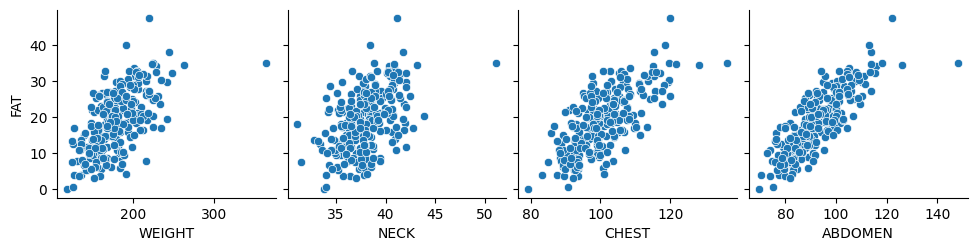

In [33]:
# 변수 간의 경향성 파악 - 그래프 분석
# 산점도 행렬 : 목표변수와 설명변수 지정
sns.pairplot(df_raw_dummy, y_vars = "FAT", x_vars=["WEIGHT", "NECK", "CHEST", "ABDOMEN"])

# 변수간 관계 확인 sns.pairplot
# seaborn 패키지를 이용하면 더 간단하게 그림을 그릴 수 있다.

# y축 FAT 컬럼과 x축 WEIGHT, NECK, CHEST, ABDOMEN의 더미 값의 변수간 관계를 확인한다.
# 결론 : 목표변수(체질 비만도, FAT)와 다수 설명변수간의 선형관계 확인
# 산점도에서 이상치 확인 (HEIGHT)

findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font famil

findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font famil

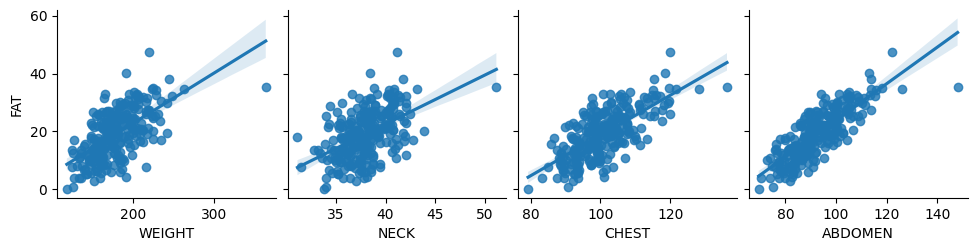

In [34]:
# 회귀 적합선 추가 : kind = "reg"
sns.pairplot(df_raw_dummy, y_vars="FAT", x_vars=["WEIGHT", "NECK", "CHEST", "ABDOMEN"], kind = "reg")

# 이상치 처리 검토 및 적절한 설명변수 선택 필요

findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font famil

findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font famil

findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font famil

findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font famil

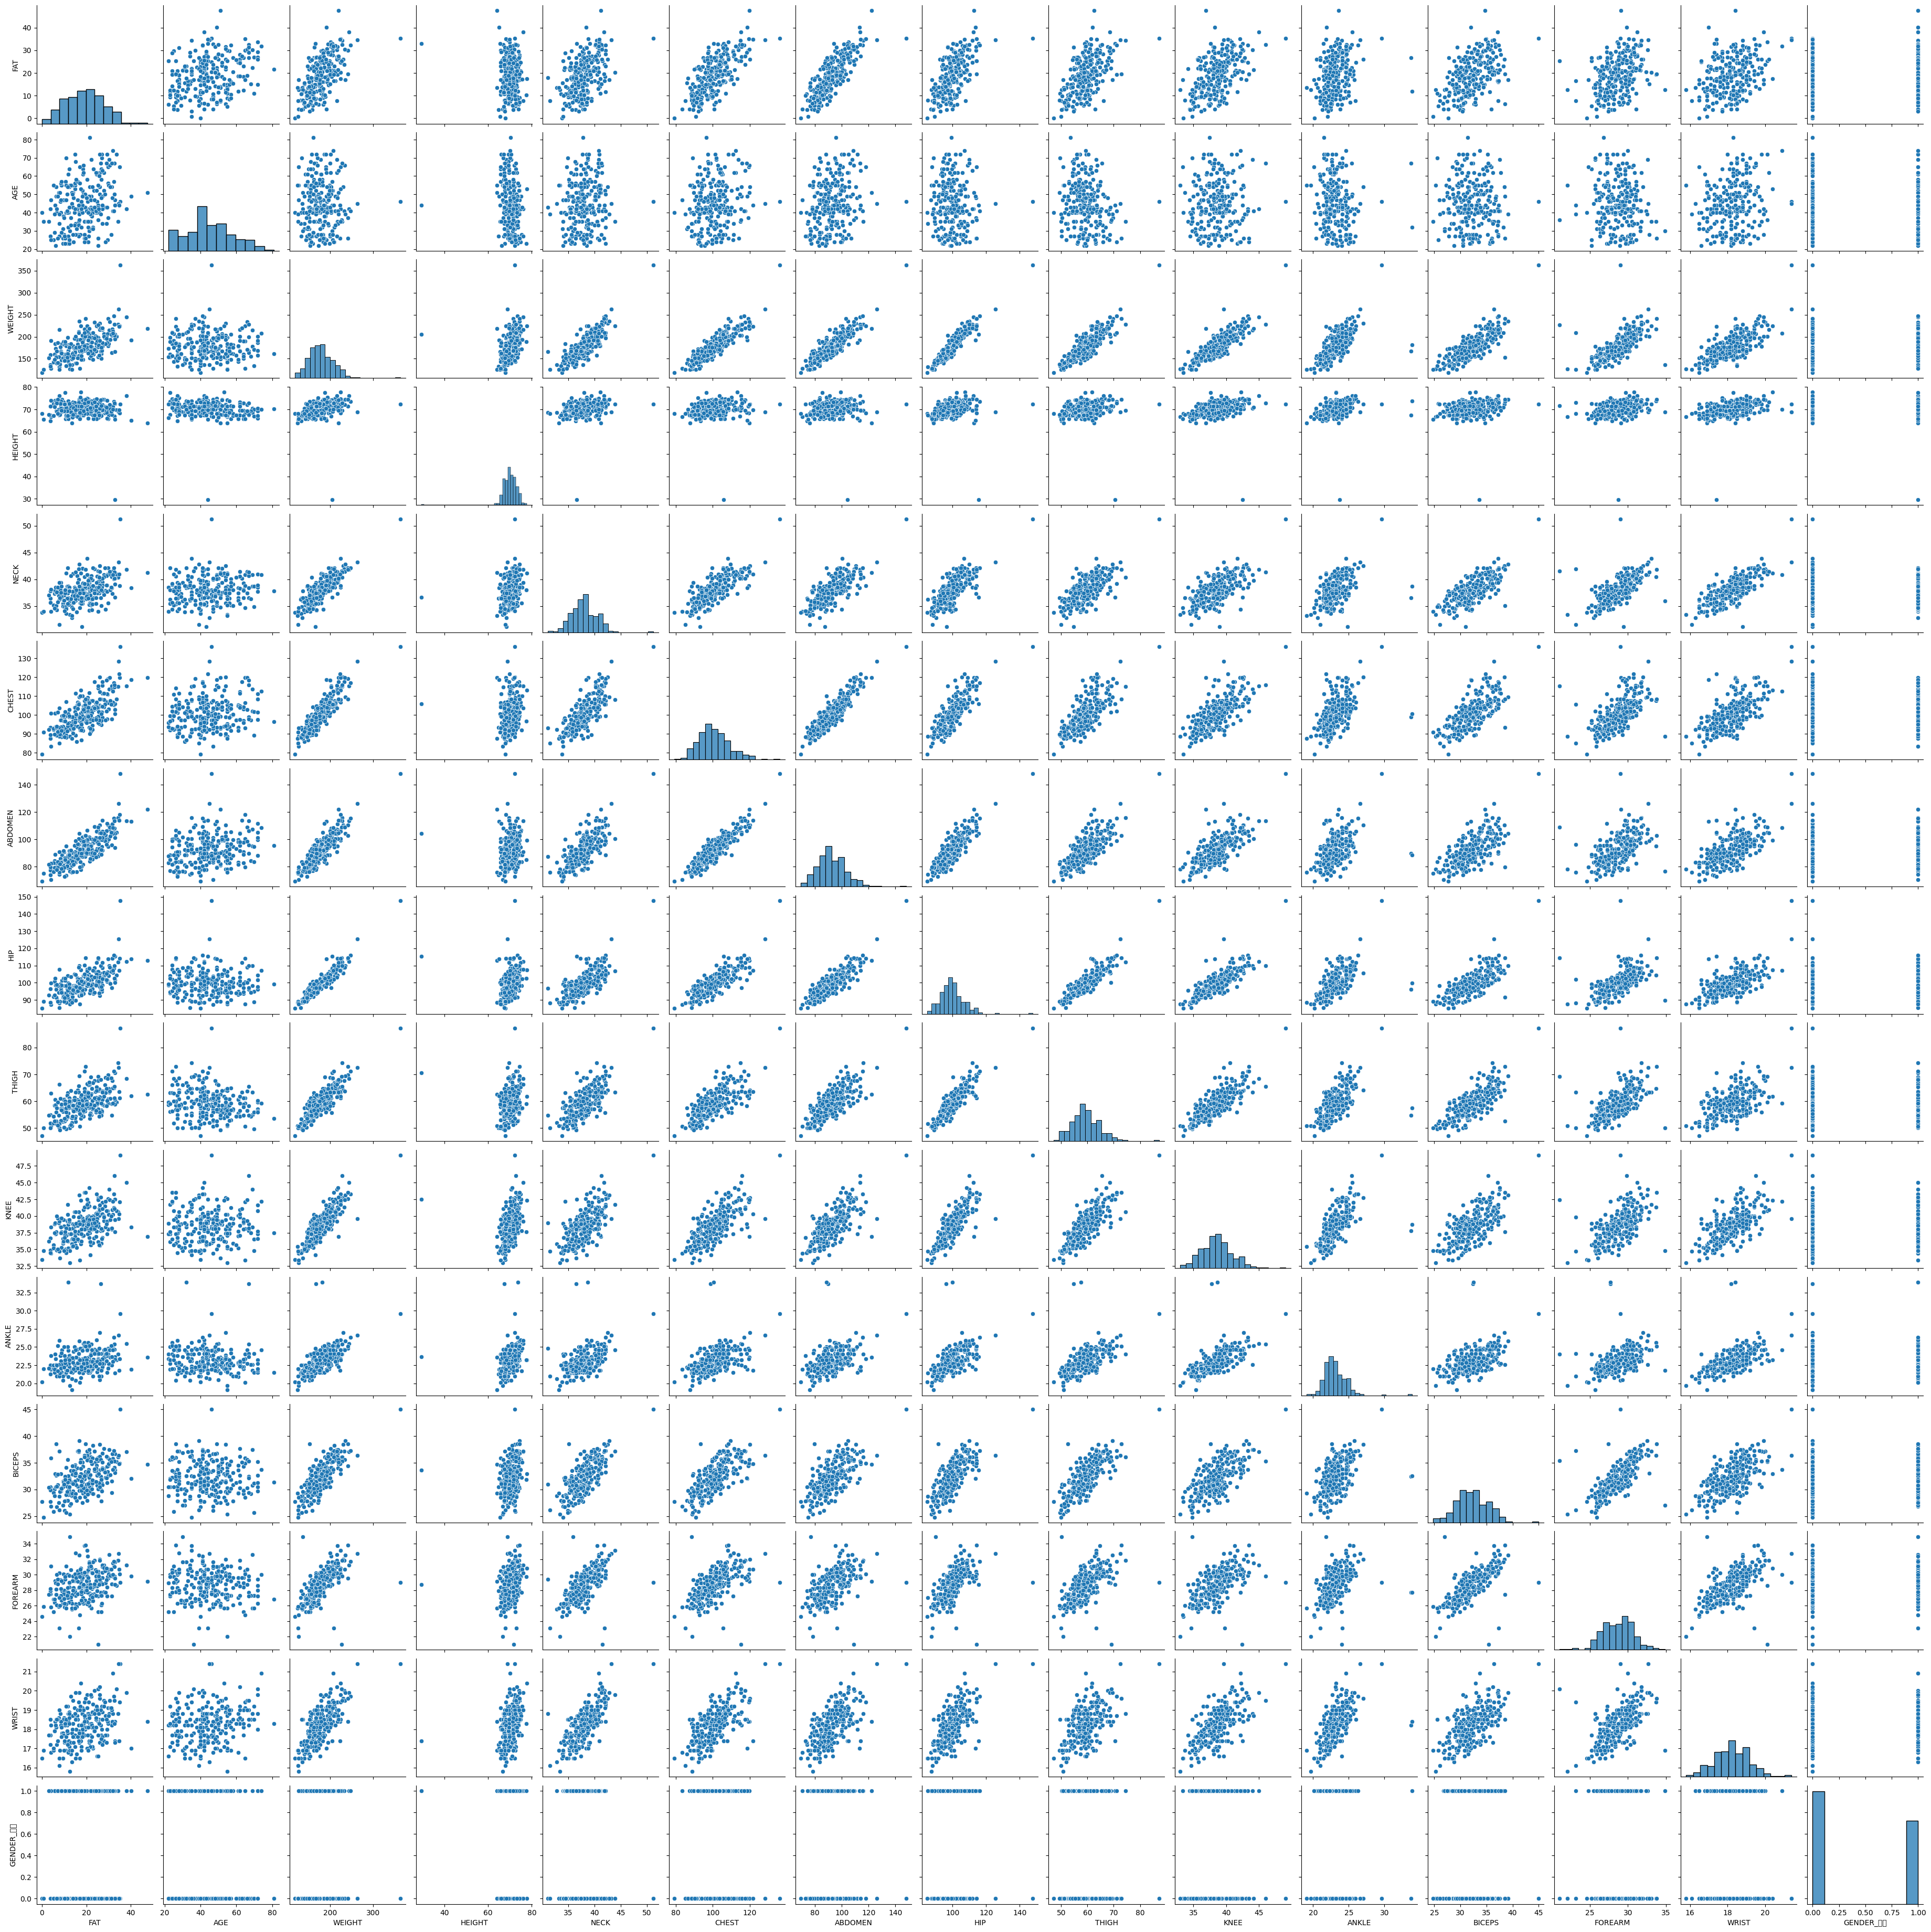

In [35]:
# 산점도 행렬 : 전체 숫자형 변수
sns.pairplot(df_raw_dummy)

# 목표변수(FAT)와 선형관계가 있는 설명변수 확인됨
# 설명변수 간의 선형관계 확인됨
# -> 몸무게(WEIGHT), 목 둘레(NECK) 등

# 설명변수 간의 다중공선성 처리 필요

In [36]:
# 상관관계 분석
df_raw_dummy.corr().round(3)

# 체질 비만도(FAT)와 가슴 둘레(CHEST), 복부 둘레(ABDOMEN) 간의 높은 선형관계 확인
# 설명변수 상관관계 : 다수 설명변수 간의 선형관계 확인 -> 다중공선성 확인 및 처리 필요

,FAT,AGE,WEIGHT,HEIGHT,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST,GENDER_여성
FAT,1.000,0.291,0.612,-0.089,0.491,0.703,0.813,0.625,0.560,0.509,0.266,0.493,0.361,0.347,-0.033
AGE,0.291,1.000,-0.013,-0.172,0.114,0.176,0.230,-0.050,-0.200,0.018,-0.105,-0.041,-0.085,0.214,-0.063
WEIGHT,0.612,-0.013,1.000,0.308,0.831,0.894,0.888,0.941,0.869,0.853,0.614,0.800,0.630,0.730,-0.009
HEIGHT,-0.089,-0.172,0.308,1.000,0.254,0.135,0.088,0.170,0.148,0.286,0.265,0.208,0.229,0.322,0.025
NECK,0.491,0.114,0.831,0.254,1.000,0.785,0.754,0.735,0.696,0.672,0.478,0.731,0.624,0.745,0.010
CHEST,0.703,0.176,0.894,0.135,0.785,1.000,0.916,0.829,0.730,0.719,0.483,0.728,0.580,0.660,-0.014
ABDOMEN,0.813,0.230,0.888,0.088,0.754,0.916,1.000,0.874,0.767,0.737,0.453,0.685,0.503,0.620,-0.017
HIP,0.625,-0.050,0.941,0.170,0.735,0.829,0.874,1.000,0.896,0.823,0.558,0.739,0.545,0.630,-0.042
THIGH,0.560,-0.200,0.869,0.148,0.696,0.730,0.767,0.896,1.000,0.799,0.540,0.761,0.567,0.559,-0.040
KNEE,0.509,0.018,0.853,0.286,0.672,0.719,0.737,0.823,0.799,1.000,0.612,0.679,0.556,0.665,-0.034


In [37]:
# 회귀 모델 생성
# train/test data 분리

df_train, df_test = train_test_split(df_raw_dummy, test_size = 0.3, random_state = 1234)
# test_size : 테스트 데이터 비율 설정
# random_state : 초기 난수 값 설정
# 훈련 데이터와 테스트 데이더를 분리할 건데 더미값에서 테스트 데이터 비율을 정하고 초기 난수 값을 설정한다.
print("train data size : {}".format(df_train.shape))
print("test data size : {}".format(df_test.shape))

train data size : (176, 15)
test data size : (76, 15)


In [39]:
# 선형 회귀 분석 : formula 이용. 상수항 (intercept) 자동 추가. 코드 주악ㄴ에서 줄 바꿈 "\" 추가
reg_model = smf.ols(formula = "FAT ~ AGE + WEIGHT + HEIGHT + NECK + CHEST + ABDOMEN + HIP + THIGH + \
                                KNEE + ANKLE + BICEPS + FOREARM + WRIST + GENDER_여성", data = df_train)
# 적합
reg_result = reg_model.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                    FAT   R-squared:                       0.769
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     38.25
Date:                Mon, 05 Aug 2024   Prob (F-statistic):           6.43e-44
Time:                        21:50:23   Log-Likelihood:                -495.19
No. Observations:                 176   AIC:                             1020.
Df Residuals:                     161   BIC:                             1068.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -35.8459     20.984     -1.708      0.0

In [42]:
# 회귀 모델 생성 : 설명변수 간의 다중공선성 확인
# 설명변수간의 다중공선성 확인 : 설명변수 데이터 생성 및 상수항 추가
df_train_x = df_train.drop('FAT', axis = 1)
# FAT 열을 삭제한다.

# statsmodels의 상수항 추가 함수 적용
# 회귀분석의 상수항 추가 : add_constant
df_train_x_const = add_constant(df_train_x)
# df_train_x에 상수항을 추가한다. df_train_x_const를

# DataFrame으로 저장
df_vif = pd.DataFrame()
df_vif["variable"] = df_train_x_const.columns # df_train_x_const행에 variable을 넣는다.
df_vif["VIF"] = [variance_inflation_factor(df_train_x_const.values, i) \ # df_train_x_csont와 i를 aaa해서 VIF을 넣는다.
                for i in range(df_train_x_const.shape[1])] # i는 df_train_x_const의 

# VIF (분산팽창계수) - 보통 10보다 크면 다중공선성이 있다고 판단 (5를 기준으로 하기도 함)
# 다중 공선성을 없애는 가장 기본적인 방법은 다른 독립변수에 의존하는 변수를 없애는 것
# 가장 의존적인 독립변수를 선택하는 방법은 VIF
# VIF는 독립변수를 다른 독립변수로 선형회귀한 성능을 나타낸 것
# variance_inflation_factor로 VIF를 계산
# variance_inflation_factor(추가할 데이터열.values, i) for i in range(추가할 데이터열.shape[1])

# VIF 정렬
df_vif.sort_values("VIF", ascending = True).round(2)
# sort_values는 값을 기준으로 레이블을 정렬하는 메서드
# ascending 인수 default 값은 True 오름차순
# ascdening 인수 False 내림차순

# 결론 : 몸무게(WEIGHT)의 VIF가 37.21로 높고 엉덩이 둘레(HIP)도 16.61 높게 나타남 -> 변수 특성, 영향을 고려하여 모델에서 제외 검토

,variable,VIF
14,GENDER_여성,1.04
3,HEIGHT,1.65
12,FOREARM,2.03
10,ANKLE,2.23
1,AGE,2.43
11,BICEPS,3.46
13,WRIST,3.52
4,NECK,4.29
9,KNEE,5.14
8,THIGH,9.02


In [43]:
# 회귀 모델 생성 : 설명변수 간의 다중공선성 확인
# 선형 회귀 분석 : 모델에서 WEIGHT 제거
reg_model = smf.ols(formula = "FAT ~ AGE + HEIGHT + NECK + CHEST + ABDOMEN + HIP + THIGH + \
                                KNEE + ANKLE + BICEPS + FOREARM + WRIST + GENDER_여성", data = df_train)
# 다중공산성 확인으로 WEIGHT 37.21로 가장 높게 나타났기 때문에 모델에서 제거한다.

# 적합
reg_result = reg_model.fit()
print(reg_result.summary())

# 제거했을 때 자유도, 결정계수, 회귀계수, 검정 통계량, 유의확률 등 확인
# Df Mdoel 모델 자유도 : 13 <14>
# Adj. R-squared : 74.4% <74.9%>
# coef 회귀계수 : Intercept 2.1903 <-35.8459>
# P > |T| p-value(=검정통계량) : 0.801 (0.090)
# 유의확률이 WEIGHT 제거 후 0.05 유의수준 보다 커짐

                            OLS Regression Results                            
Dep. Variable:                    FAT   R-squared:                       0.763
Model:                            OLS   Adj. R-squared:                  0.744
Method:                 Least Squares   F-statistic:                     40.16
Date:                Tue, 06 Aug 2024   Prob (F-statistic):           6.67e-44
Time:                        05:56:05   Log-Likelihood:                -497.32
No. Observations:                 176   AIC:                             1023.
Df Residuals:                     162   BIC:                             1067.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.1903      8.664      0.253      0.8

In [49]:
# 회귀 모델 생성 : 설명변수 간의 다중공선성 처리
# 다중공선성 재확인
df_train_x = df_train.drop(["FAT", "WEIGHT"], axis = 1)
# FAT열과 WEIGHT 열을 삭제한다.

# statsmodels의 상수항 추가 함수 적용
df_train_x_const = add_constant(df_train_x)
# df_train_x에 상수항을 추가한다. df_train_x_const를

# DataFrame으로 저장
df_vif = pd.DataFrame()
df_vif["Variable"] = df_train_x_const.columns # df_train_x_const행에 variable을 넣는다.
df_vif["VIF"] = [variance_inflation_factor(df_train_x_const.values, i) \# df_train_x_csont와 i를 aaa해서 VIF을 넣는다.
                for i in range(df_train_x_const.shape[1])] # i는 df_train_x_const의 

# VIF 정렬
df_vif.sort_values("VIF", ascending = True).round(2)
# VIF를 오름차순으로 정려하고 소숫점 두자리까지 표현한다.

# 결론 : ABDOMEN 12.9로 다중공선성이 의심되나, 목표변수에 가장 영향이 큰 변수이므로 제거하지 않음 (다중공선성 일부 해결)
# 전후 비교해보기

,Variable,VIF
13,GENDER_여성,1.04
2,HEIGHT,1.36
11,FOREARM,2.03
9,ANKLE,2.11
1,AGE,2.34
10,BICEPS,3.37
12,WRIST,3.42
3,NECK,3.81
8,KNEE,4.65
4,CHEST,8.81


In [50]:
# 회귀 모델 생성 : 유의한 설명변수 확인
# 선형 회귀 분석(유의하지 않은 변수 중 p-value가 가장 큰 것을 하나씩 반복적으로 제거)
reg_model = smf.ols(formula = "FAT ~ HEIGHT + NECK + ABDOMEN + HIP + FOREARM", data = df_train)
reg_result = reg_model.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                    FAT   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.743
Method:                 Least Squares   F-statistic:                     102.3
Date:                Tue, 06 Aug 2024   Prob (F-statistic):           2.18e-49
Time:                        06:22:51   Log-Likelihood:                -501.89
No. Observations:                 176   AIC:                             1016.
Df Residuals:                     170   BIC:                             1035.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.7817      7.302      0.381      0.7

In [52]:
# 단위를 나타내는 항목 제외
df_raw = df_raw.drop(['WEIGHT_UNIT', 'HEIGHT_UNIT'], axis = 1)
# axis = 0은 행
# axis = 1은 열

# 행/열 삭제 drop
# drop 메서드는 데이터프레임에서 열을 삭제하는 메서드이다.# 회귀 모델 생성 : 설명변수 간의 다중공선성 재확인
# 설명변수간의 다중공선성 확인 : 설명변수 데이터 생성 및 상수항 추가
df_train_x = df_train[["HEIGHT", "NECK", "ABDOMEN", "HIP", "FOREARM"]]
# train함수에 위 함수를 넣는다. 

# statsmodels의 상수항 추가 함수 적용
df_train_x_const = add_constant(df_train_x)
# df_train_x에 상수항을 추가한다. df_train_x_const를

# DataFrame으로 저장
df_vif = pd.DataFrame()
df_vif["variable"] = df_train_x_const.columns # df_train_x_const행에 variable을 넣는다.
df_vif["VIF"] = [variance_inflation_factor(df_train_x_const.values, i) \ # df_train_x_csont와 i를 aaa해서 VIF을 넣는다.
                for i in range(df_train_x_const.shape[1])] # i는 df_train_x_const의

# VIF 정렬
df_vif.sort_values('VIF', inplace = True)
df_vif.round(2)
# sort_values에서 inplace는 원본을 대체할지 여부이다. True일 경우 원본을 대체하게 된다.
# 즉, VIF 값을 원본을 대체하고 소수점 2자리 수까지 표현하며 정렬하라.

# 결론 : VIF가 10 미만이므로, 다중공선성 해결

,variable,VIF
1,HEIGHT,1.14
5,FOREARM,1.57
2,NECK,2.87
3,ABDOMEN,4.91
4,HIP,4.95
0,const,516.31


findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font famil

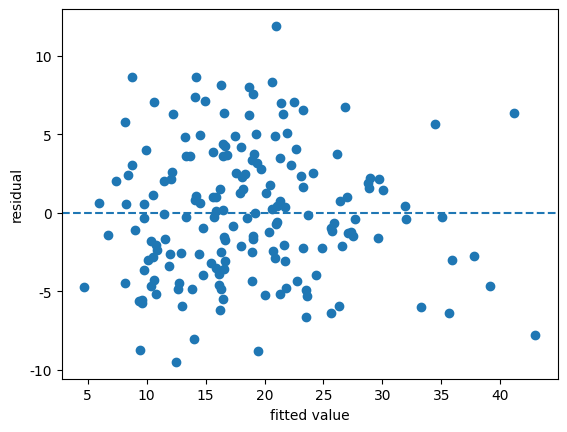

In [55]:
# 회귀 모델 생성 : 잔차의 가정 확인
# 1. 등분산성 검정
# 잔차 산점도 : X-예측값, Y-잔차

plt.scatter(reg_result.fittedvalues, reg_result.resid)
plt.xlabel("fitted value"); plt.ylabel("residual") # xlabel, ylabel 이름 설정
plt.axhline(y = 0, linestyle = "--") # 가로선 y = 0일 기준으로 -- 표시

# 잔차가 y=0을 기준으로 Random하게 산포되어 있으므로 등분산성을 만족

findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font famil

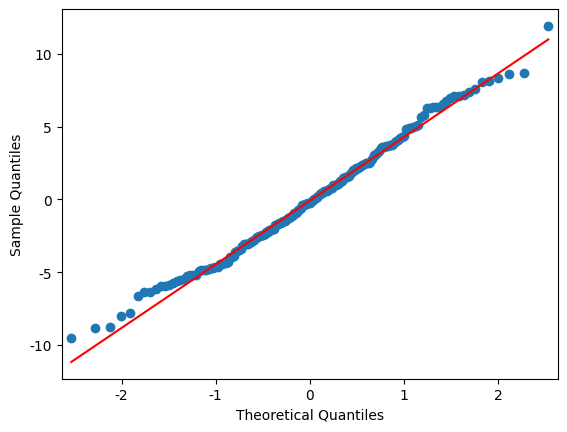

findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font famil

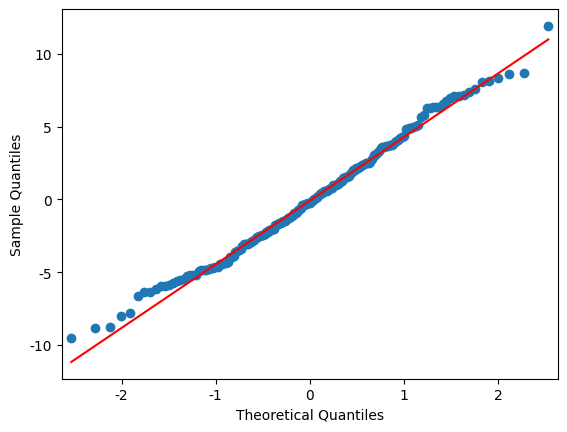

In [56]:
# 2. 정규성 검정
# 잔차 정규성 검정 : Q-Q plot, s-standardized line,
# r-regression line, q-quartiles
qqplot(reg_result.resid, line = "q")

# 정규분포 직선(적색 선)을 중심으로 분포하므로 정규분포를 따름

findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font famil

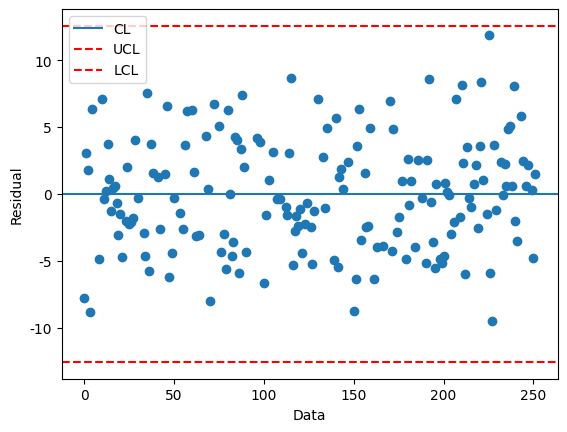

In [58]:
# 회귀 모델 생성 : 잔차의 가정 확인
# 독립성 검정
# 잔차의 독립성 확인
plt.scatter(df_train.index, reg_result.resid)
plt.xlabel("Data"); plt.ylabel("Residual")
plt.axhline(y=0, linestyle = "-", label = 'CL')
plt.axhline(y=3*np.std(reg_result.resid), linestyle="--", color = "red", label = 'UCL')
plt.axhline(y=-3*np.std(reg_result.resid), linestyle="dashed", color = "red", label = 'LCL')
plt.legend()

# 잔차가 y=0을 기준으로 관리상하한을 벗어나지 않고, Random하게 산포되어 있으므로 독립성을 만족

In [59]:
# 평가용 데이터에 대한 성능 확인
train_pred = reg_result.predict(df_train) # df_train에 대한 예측값을 train_pred 변수에 저장
test_pred = reg_result.predict(df_test) # df_test에 대한 예측값을 test_pred 변수에 저장
print("train data의 결정계수:", r2_score(df_train['FAT'], train_pred))
print("test data의 결정계수:", r2_score(df_test['FAT'], test_pred))

# R2 Score
# 결정 계수는 R2 Score이라고 불리는 선형 회귀 분석시 사용되는 회귀 모델의 적합도를 나타내는 지표 중 하나
# R2 Score은 0과 1사이의 값으로 나타내고, 높을수록 모델이 데이터를 잘 설명한다는 것을 의미

# SSE/SST가 R2-Scroe(결정계수)
# SSE/SST 혹은 1-(SSR/SST)가 바로 결정계수이다.

# train data의 결정계수는 75.1% test data의 결정계수는 65.8%

train data의 결정계수: 0.7505481797941164
test data의 결정계수: 0.6575253938890118


In [61]:
#평가용 데이터에 대한 실제값과 예측값 확인 (10개 확인)
print("test data의 실제값 : \n", df_test['FAT'].head(10))
print("")
print("test data의 실제값 : \n", test_pred[:10])

test data의 실제값 : 
 208     8.0
94      9.6
31     34.3
248    23.6
216    31.4
6      23.3
91      5.2
73     12.5
129    13.9
5      24.2
Name: FAT, dtype: float64

test data의 실제값 : 
 208    13.686776
94     17.300433
31     36.053977
248    19.637927
216    22.717339
6      18.350734
91     14.782581
73     12.623424
129    15.831971
5      24.912352
dtype: float64


In [62]:
# 후진제거법을 이용한 변수 선택
# RFE(recursive feature elimination) 함수 : 입력된 모델을 이용하여 변수중요도가 낮은 순으로 순차적으로 제거

# 목표변수 / 설명변수 분리
df_train_y = df_train['FAT'] # FAT 행을 y에 저장해놓는다. swap처럼
df_train_x = df_train.drop('FAT', axis = 1) # FAT 행을 제거 한다.

#sklearn의 선형회귀 모델
model = LinearRegression() #  선형회귀모델 불러오기

# 전체 변수 중 5개의 변수가 남을 때까지 변수 선택
rfe = RFE(estimator = model, n_features_to_select = 5).fit(df_train_x, df_train_y)
# 전체 feature에 대해 훈련 후 중요하지 않은 feature들을 제거하면서 원하는 개수의 feature 수만 남기도록 하는 방법이다.
# estimator : feature importance가 계산 가능한 모델
# estimator로 선형회귀모델(LinearREgression)을 쓰겠다.

# n_features_to_select : 남겨질 중요한 feature의 수를 선언. 지정하지 않을 경우 원래 feature의 절반이 선택됨(default값)
# 즉, 중요도가 높은 5개의 변수가 남을 때까지 실행


# 선택된 변수
selected_cols = df_train_x.columns[rfe.support_]
# 제거된 변수
removed_cols = df_train_x.columns[~rfe.support_]

# support_ : 선택된 feature를 가리키는 마스크를 리턴한다.

print("Select Variables : {}".format(selected_cols))
print("REmoved Variables : {}".format(removed_cols))

# 결론 : 목둘레(NECK), 복부 둘레(ABDOMEN), 발목 둘레(ANKLE), 팔뚝 둘레(FOREARM), 손목 둘레(WRIST) 변수 선택

Select Variables : Index(['NECK', 'ABDOMEN', 'ANKLE', 'FOREARM', 'WRIST'], dtype='object')
REmoved Variables : Index(['AGE', 'WEIGHT', 'HEIGHT', 'CHEST', 'HIP', 'THIGH', 'KNEE', 'BICEPS',
       'GENDER_여성'],
      dtype='object')


In [65]:
# 후진제거법을 이용한 변수 선택 및 모델 생성
# 회귀 모델 생성
rfe_reg_model = smf.ols(formula = "FAT ~ NECK + ABDOMEN + ANKLE + FOREARM + WRIST", data = df_train)

# 적합
rfe_reg_result = rfe_reg_model.fit()
print(rfe_reg_result.summary())

# 수작업으로 변수 선택한 내용과 다름

                            OLS Regression Results                            
Dep. Variable:                    FAT   R-squared:                       0.724
Model:                            OLS   Adj. R-squared:                  0.716
Method:                 Least Squares   F-statistic:                     89.26
Date:                Tue, 06 Aug 2024   Prob (F-statistic):           1.07e-45
Time:                        07:25:15   Log-Likelihood:                -510.73
No. Observations:                 176   AIC:                             1033.
Df Residuals:                     170   BIC:                             1052.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -9.3447      6.993     -1.336      0.1

<Axes: >

findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font famil

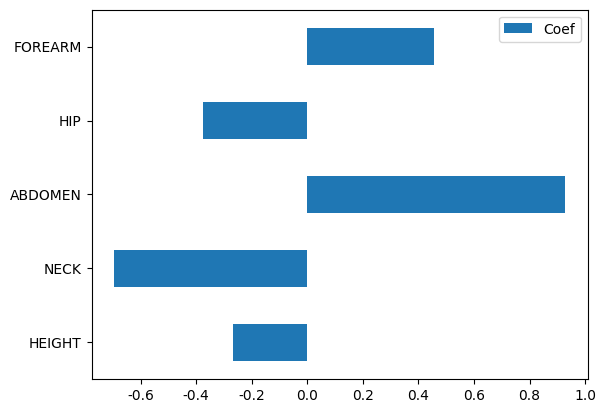

In [66]:
# 변수 중요도 확인 : 비표준화 회귀계수 기준
# 설명변수 중요도
df_reg_coef = pd.DataFrame({"Coef":reg_result.params.values[1:]},
                          index = ['HEIGHT','NECK','ABDOMEN','HIP','FOREARM'])
df_reg_coef.plot.barh(y = "Coef")

# 수평 막대 그리기 barh() 

# 중요도는 회귀계수의 절대값 크기
# 팔뚝 둘레(FOREARM)와 복부 둘레(ABBOMEN)는 커질수록 체질 비만도(FAT)가 높음

# 결론 : 표준화 회귀계수를 이용한 변수 중요도 : 생략(회귀계수의 방향은 동일하나 중요도 크기가 변함)

In [67]:
# p64 실습은 과제 참고 (존나 김)

In [68]:
# p71 연습
# 아래는 직원들의 체질검사 데이터이다. 체질 비만도를 예측하기 위한 규제화 회귀분석을 실시하고 결과를 해석하시오.
# 데이터 : 체질검사.csv (변수 : 15, 자료 수 : 252개)

# 1. 데이터 불러오기
# 2. 규제화 회귀분석 모델 생성

import pandas as pd # 데이터 구성 : Series, DataFrame
import numpy as np # 행렬 연산
import matplotlib # 데이터 시각화
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.formula.api as smf # 선형 회귀모델 formula(y ~ X1 + X2 + ...)
from statsmodels.api import qqplot, add_constant # 잔차의 정규성 확인 : qqplot, 회귀분석의 상수항 추가 : add_constant
from statsmodels.stats.outliers_influence import variance_inflation_factor # 다중공선성 확인
from sklearn.model_selection import train_test_split # 학습용/평가용 데이터 분리 : train, test
from sklearn.linear_model import LinearRegression # 선형회귀모형
from sklearn.feature_selection import RFE # 변수선택법(후진제거법)
from sklearn.preprocessing import StandardScaler # Scale 변환 -> 표준화 회귀계수 산출
from sklearn.metrics import r2_score # 평가함수

# 추가 패키지 
from sklearn.linear_model import Ridge, Lasso, ElasticNet
# Ridge, Lasso, ElasticNet 패키지 불러오기

In [69]:
# 한글 폰트
matplotlib.rc("font", family = "Malgun Gothic") # 맑은 고딕 적용
matplotlib.rc("axes", unicode_minus = False) # 음수 표시

In [70]:
# 데이터 구성하기
df_raw = pd.read_csv("/home/piai/다운로드/2주차 실습파일/2. Big Data 분석/체질검사.csv", encoding = 'euc-kr')
df_raw.head()

,FAT,AGE,WEIGHT,HEIGHT,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST,GENDER
0,35.2,46,363.15 lb,72.25 inch,51.2,136.2,148.1,147.7,87.3,49.1,29.6,45.0,29.0,21.4,남성
1,11.8,27,168 lb,71.25 inch,38.1,93.0,79.1,94.5,57.3,36.2,24.5,29.0,30.0,18.8,남성
2,22.2,69,177.75 lb,68.5 inch,38.7,102.0,95.0,98.3,55.0,38.3,21.8,30.8,25.7,18.8,남성
3,10.6,57,147.75 lb,65.75 inch,35.2,99.6,86.4,90.1,53.0,35.0,21.3,31.7,27.3,16.9,여성
4,47.5,51,219 lb,64 inch,41.2,119.8,122.1,112.8,62.5,36.9,23.6,34.7,29.1,18.4,여성


In [71]:
# 단위와 같이 표현되어 있는 수치형 변수 처리

df_raw[['WEIGHT', 'WEIGHT_UNIT']] = df_raw['WEIGHT'].str.split(expand = True)
# 데이터프레임 WEIGHT의 문장을 분리하고 두 개의 컬럼으로 분리한다.(WEIGHT과 WEIGHT_UNIT 으로)
df_raw[['HEIGHT', 'HEIGHT_UNIT']] = df_raw['HEIGHT'].str.split(expand = True)
# 데이터프레임 HEIGHT의 문장을 분리하고 두 개의 컬럼으로 분리한다.(HEIGHT과 HEIGHT_UNIT 으로)

df_raw['WEIGHT'] = df_raw['WEIGHT'].astype('float64')
# WEIGHT은 숫자+단위로 되어 있기 때문에 아마 문장이었을 것이다.
# 이제 숫자와 문자 컬럼을 분리했지만 아직 문자기 때문에 직접 실수형으로 타입을 변경해서 값을 저장한다.
df_raw['HEIGHT'] = df_raw['HEIGHT'].astype('float64')
# astype()을 사용한 데이터형 dtype 변환
# float64 실수형 배 정밀도 부동소수점형

df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   FAT          252 non-null    float64
 1   AGE          252 non-null    int64  
 2   WEIGHT       252 non-null    float64
 3   HEIGHT       252 non-null    float64
 4   NECK         252 non-null    float64
 5   CHEST        252 non-null    float64
 6   ABDOMEN      252 non-null    float64
 7   HIP          252 non-null    float64
 8   THIGH        252 non-null    float64
 9   KNEE         252 non-null    float64
 10  ANKLE        252 non-null    float64
 11  BICEPS       252 non-null    float64
 12  FOREARM      252 non-null    float64
 13  WRIST        252 non-null    float64
 14  GENDER       252 non-null    object 
 15  WEIGHT_UNIT  252 non-null    object 
 16  HEIGHT_UNIT  252 non-null    object 
dtypes: float64(13), int64(1), object(3)
memory usage: 33.6+ KB


In [72]:
# 단위를 나타내는 항목 제외
df_raw = df_raw.drop(['WEIGHT_UNIT', 'HEIGHT_UNIT'], axis = 1)

In [73]:
# 범주형 변수의 Dummy 변수화
df_raw_dummy = pd.get_dummies(df_raw, drop_first = True)
df_raw_dummy.head()

# 더미를 만들 건데 데이터프레임을 결측값을 처리하여 더미값을 만들어낸다.
# 밑에 결과를 보면 GENDER가 object형인데 더미값으로 수치화된 데이터로 변환된 것을 확인할 수 있다.

,FAT,AGE,WEIGHT,HEIGHT,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST,GENDER_여성
0,35.2,46,363.15,72.25,51.2,136.2,148.1,147.7,87.3,49.1,29.6,45.0,29.0,21.4,0
1,11.8,27,168.00,71.25,38.1,93.0,79.1,94.5,57.3,36.2,24.5,29.0,30.0,18.8,0
2,22.2,69,177.75,68.50,38.7,102.0,95.0,98.3,55.0,38.3,21.8,30.8,25.7,18.8,0
3,10.6,57,147.75,65.75,35.2,99.6,86.4,90.1,53.0,35.0,21.3,31.7,27.3,16.9,1
4,47.5,51,219.00,64.00,41.2,119.8,122.1,112.8,62.5,36.9,23.6,34.7,29.1,18.4,1


In [77]:
# 목표변수, 설명변수 데이터 지정
df_raw_y = df_raw_dummy["FAT"] # FAT열을 df_rwa_y에 저장 swap처럼
df_raw_x = df_raw_dummy.drop("FAT", axis = 1, inplace = False)
 # FAT열 제거 하고 열을 저장 안한다.
# inplace = False 저장안함
# inplace = true 저장함

df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x, df_raw_y, test_size = 0.3, random_state = 1234)

print("train data X size : {}".format(df_train_x.shape))
print("train data Y size : {}".format(df_train_y.shape))
print("test data X size : {}".format(df_test_x.shape))
print("test data Y size : {}".format(df_test_y.shape))

train data X size : (176, 14)
train data Y size : (176,)
test data X size : (76, 14)
test data Y size : (76,)
